In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import scipy.stats as stats

In [3]:
np.random.seed(42)

In [4]:
X = np.linspace(0, 10, 200)
y = 3 * X + np.random.normal(0, 3, 200)

In [5]:
df = pd.DataFrame({"x": X, "y": y})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[["x"]], df["y"], test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [9]:
r2 = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("R²:", r2)
print("RMSE:", rmse)

R²: 0.9054869134147654
RMSE: 2.635761088043018


In [10]:
residuals = y_test - y_pred_test

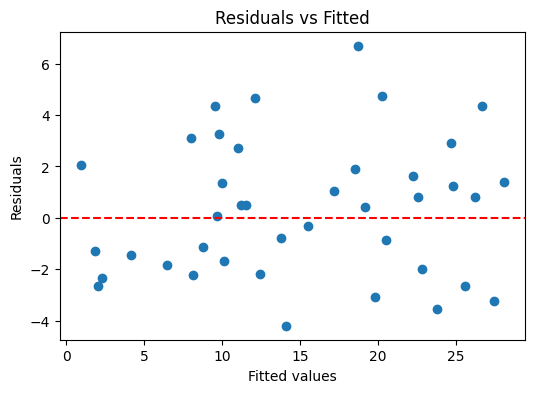

In [11]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred_test, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

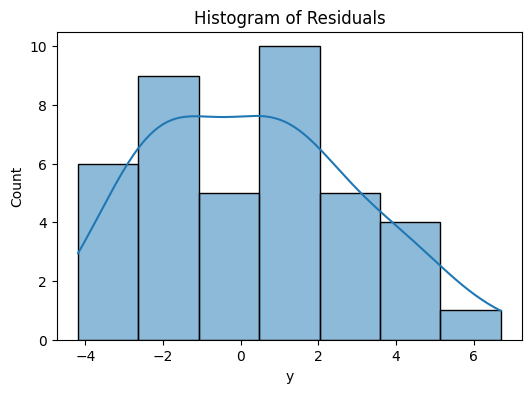

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

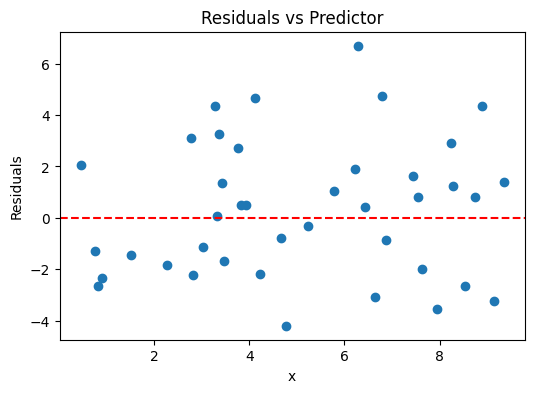

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(X_test, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("x")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictor")
plt.show()

Linearity: Random scatter in residuals vs fitted
Independence: no trend in residuals vs predictor
Homoscedasticity: Roughly equal variance of residuals
Normality: Histogram approximately normal

Do you trust this model? Yes, the baseline linear model is fairly trustworthy because diagnostics support the assumptions and metrics (high R², low RMSE) suggest good predictive accuracy.

Did assumptions hold? Mostly yes. Residuals show no major violations of linearity, independence, homoscedasticity, or normality.

Compare baseline vs transformed feature: Adding the quadratic term slightly improves R² and reduces RMSE, showing that a curved relationship can capture variance better. Importantly, this is still linear regression because coefficients remain linear in the parameters.

Next steps for improvement: Test with real-world data, try additional predictors, consider regularization if adding many features, and validate with cross-validation for stronger reliability.